In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [3]:
DATASET_PATH = Path('/home/jupyter/datasets')

In [4]:
# Transformations are applied only on training dataset
mask_datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=100),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.3),
    batch_tfms=aug_transforms(mult=2)
)

dls = mask_datablock.dataloaders(DATASET_PATH)
# dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [22]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [18]:
learn.fine_tune(16)

epoch,train_loss,valid_loss,error_rate,time
0,0.119080,0.333071,0.082192,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.103800,0.264486,0.068493,00:05
1,0.079329,0.261406,0.075342,00:05
2,0.077226,0.304730,0.075342,00:05
3,0.077909,0.301795,0.075342,00:04
4,0.083709,0.276483,0.061644,00:05
5,0.090930,0.355277,0.068493,00:05
6,0.097131,0.384800,0.061644,00:05
7,0.105207,0.379701,0.068493,00:06
8,0.101411,0.360125,0.075342,00:05
9,0.097651,0.334345,0.061644,00:05


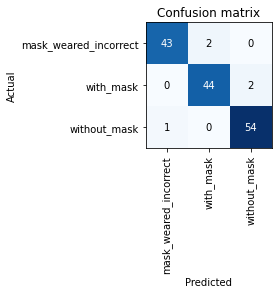

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

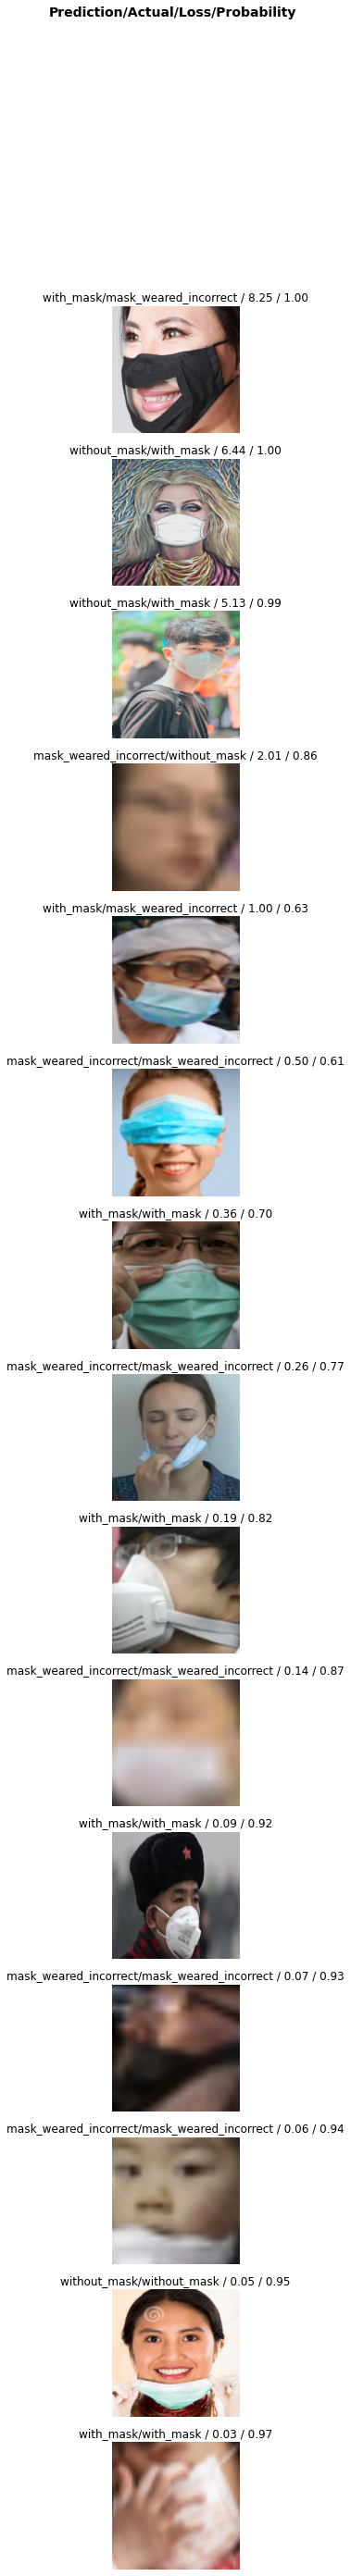

In [20]:
interp.plot_top_losses(15, nrows=15)

In [21]:
learn.export()